## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.layers import Dropout
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, drp_ratio, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
Dropout_ratio = [0.1, 0.2 ,0.3 ,0.4, 0.5]

In [7]:
results = {}

for ratio in Dropout_ratio:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "Dropout_ratio-%s" % str(ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



W0723 18:38:35.596416 20764 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 18:38:35.692377 20764 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 18:38:35.705353 20764 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 18:38:35.730356 20764 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

Epoch 46/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4223 - acc: 0.4893 - val_loss: 1.3854 - val_acc: 0.5031
Epoch 47/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4118 - acc: 0.4947 - val_loss: 1.3822 - val_acc: 0.5010
Epoch 48/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4112 - acc: 0.4922 - val_loss: 1.3807 - val_acc: 0.5058
Epoch 49/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4107 - acc: 0.4932 - val_loss: 1.3958 - val_acc: 0.5055
Epoch 50/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4075 - acc: 0.4965 - val_loss: 1.3781 - val_acc: 0.5058
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512) 

Epoch 41/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4589 - acc: 0.4759 - val_loss: 1.3999 - val_acc: 0.4934
Epoch 42/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4481 - acc: 0.4793 - val_loss: 1.4058 - val_acc: 0.4914
Epoch 43/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4479 - acc: 0.4794 - val_loss: 1.4086 - val_acc: 0.4944
Epoch 44/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4320 - acc: 0.4838 - val_loss: 1.4054 - val_acc: 0.4924
Epoch 45/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4325 - acc: 0.4881 - val_loss: 1.3998 - val_acc: 0.4945
Epoch 46/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4290 - acc: 0.4849 - val_loss: 1.3909 - val_acc: 0.4974
Epoch 47/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4253 - acc: 0.4860 - val_loss: 1.3965 - val_acc: 0.4946
Epoch 48/50
50000/50000 [==

Epoch 36/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4979 - acc: 0.4589 - val_loss: 1.4369 - val_acc: 0.4839
Epoch 37/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4881 - acc: 0.4633 - val_loss: 1.4581 - val_acc: 0.4731
Epoch 38/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4820 - acc: 0.4665 - val_loss: 1.4294 - val_acc: 0.4812
Epoch 39/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4746 - acc: 0.4712 - val_loss: 1.4262 - val_acc: 0.4905
Epoch 40/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4689 - acc: 0.4744 - val_loss: 1.4059 - val_acc: 0.4954
Epoch 41/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4589 - acc: 0.4741 - val_loss: 1.4130 - val_acc: 0.4948
Epoch 42/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4546 - acc: 0.4777 - val_loss: 1.4063 - val_acc: 0.4986
Epoch 43/50
50000/50000 [==

50000/50000 [==============================] - 6s 127us/step - loss: 1.5344 - acc: 0.4419 - val_loss: 1.4575 - val_acc: 0.4785
Epoch 31/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5306 - acc: 0.4473 - val_loss: 1.4675 - val_acc: 0.4704
Epoch 32/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5233 - acc: 0.4524 - val_loss: 1.4378 - val_acc: 0.4819
Epoch 33/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5159 - acc: 0.4538 - val_loss: 1.4565 - val_acc: 0.4747
Epoch 34/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5117 - acc: 0.4546 - val_loss: 1.4475 - val_acc: 0.4726
Epoch 35/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4988 - acc: 0.4601 - val_loss: 1.4389 - val_acc: 0.4848
Epoch 36/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4979 - acc: 0.4591 - val_loss: 1.4421 - val_acc: 0.4803
Epoch 37/50
50000/50000 [==============

Epoch 25/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5682 - acc: 0.4353 - val_loss: 1.4695 - val_acc: 0.4721
Epoch 26/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5566 - acc: 0.4382 - val_loss: 1.4676 - val_acc: 0.4706
Epoch 27/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5540 - acc: 0.4423 - val_loss: 1.4590 - val_acc: 0.4766
Epoch 28/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5441 - acc: 0.4460 - val_loss: 1.4627 - val_acc: 0.4731
Epoch 29/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5335 - acc: 0.4494 - val_loss: 1.4431 - val_acc: 0.4780
Epoch 30/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5260 - acc: 0.4499 - val_loss: 1.4561 - val_acc: 0.4755
Epoch 31/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5145 - acc: 0.4566 - val_loss: 1.4340 - val_acc: 0.4842
Epoch 32/50
50000/50000 [==

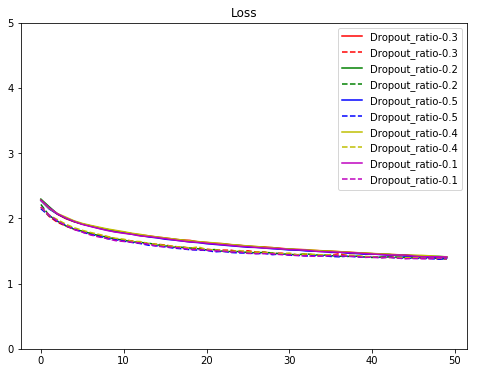

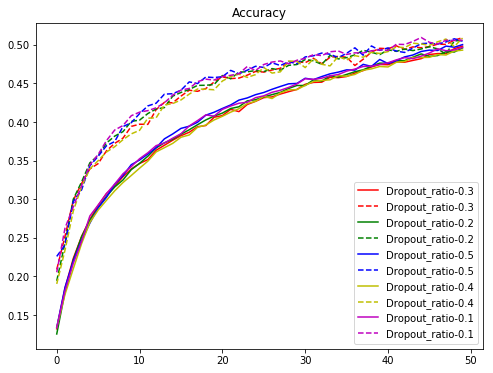

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%6])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%6])
plt.title("Accuracy")
plt.legend()
plt.show()